In [27]:
! pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
! pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import numpy as np # array manipulation
from huggingface_hub import from_pretrained_keras # download the model
import keras # deep learning
from PIL import Image # Image processing

In [30]:
model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

config.json not found in HuggingFace Hub


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

In [31]:
#005e53b1b6aada 00354cd9244e28

low_light_img = Image.open(r'/content/IPhone.jpeg').convert('RGB')

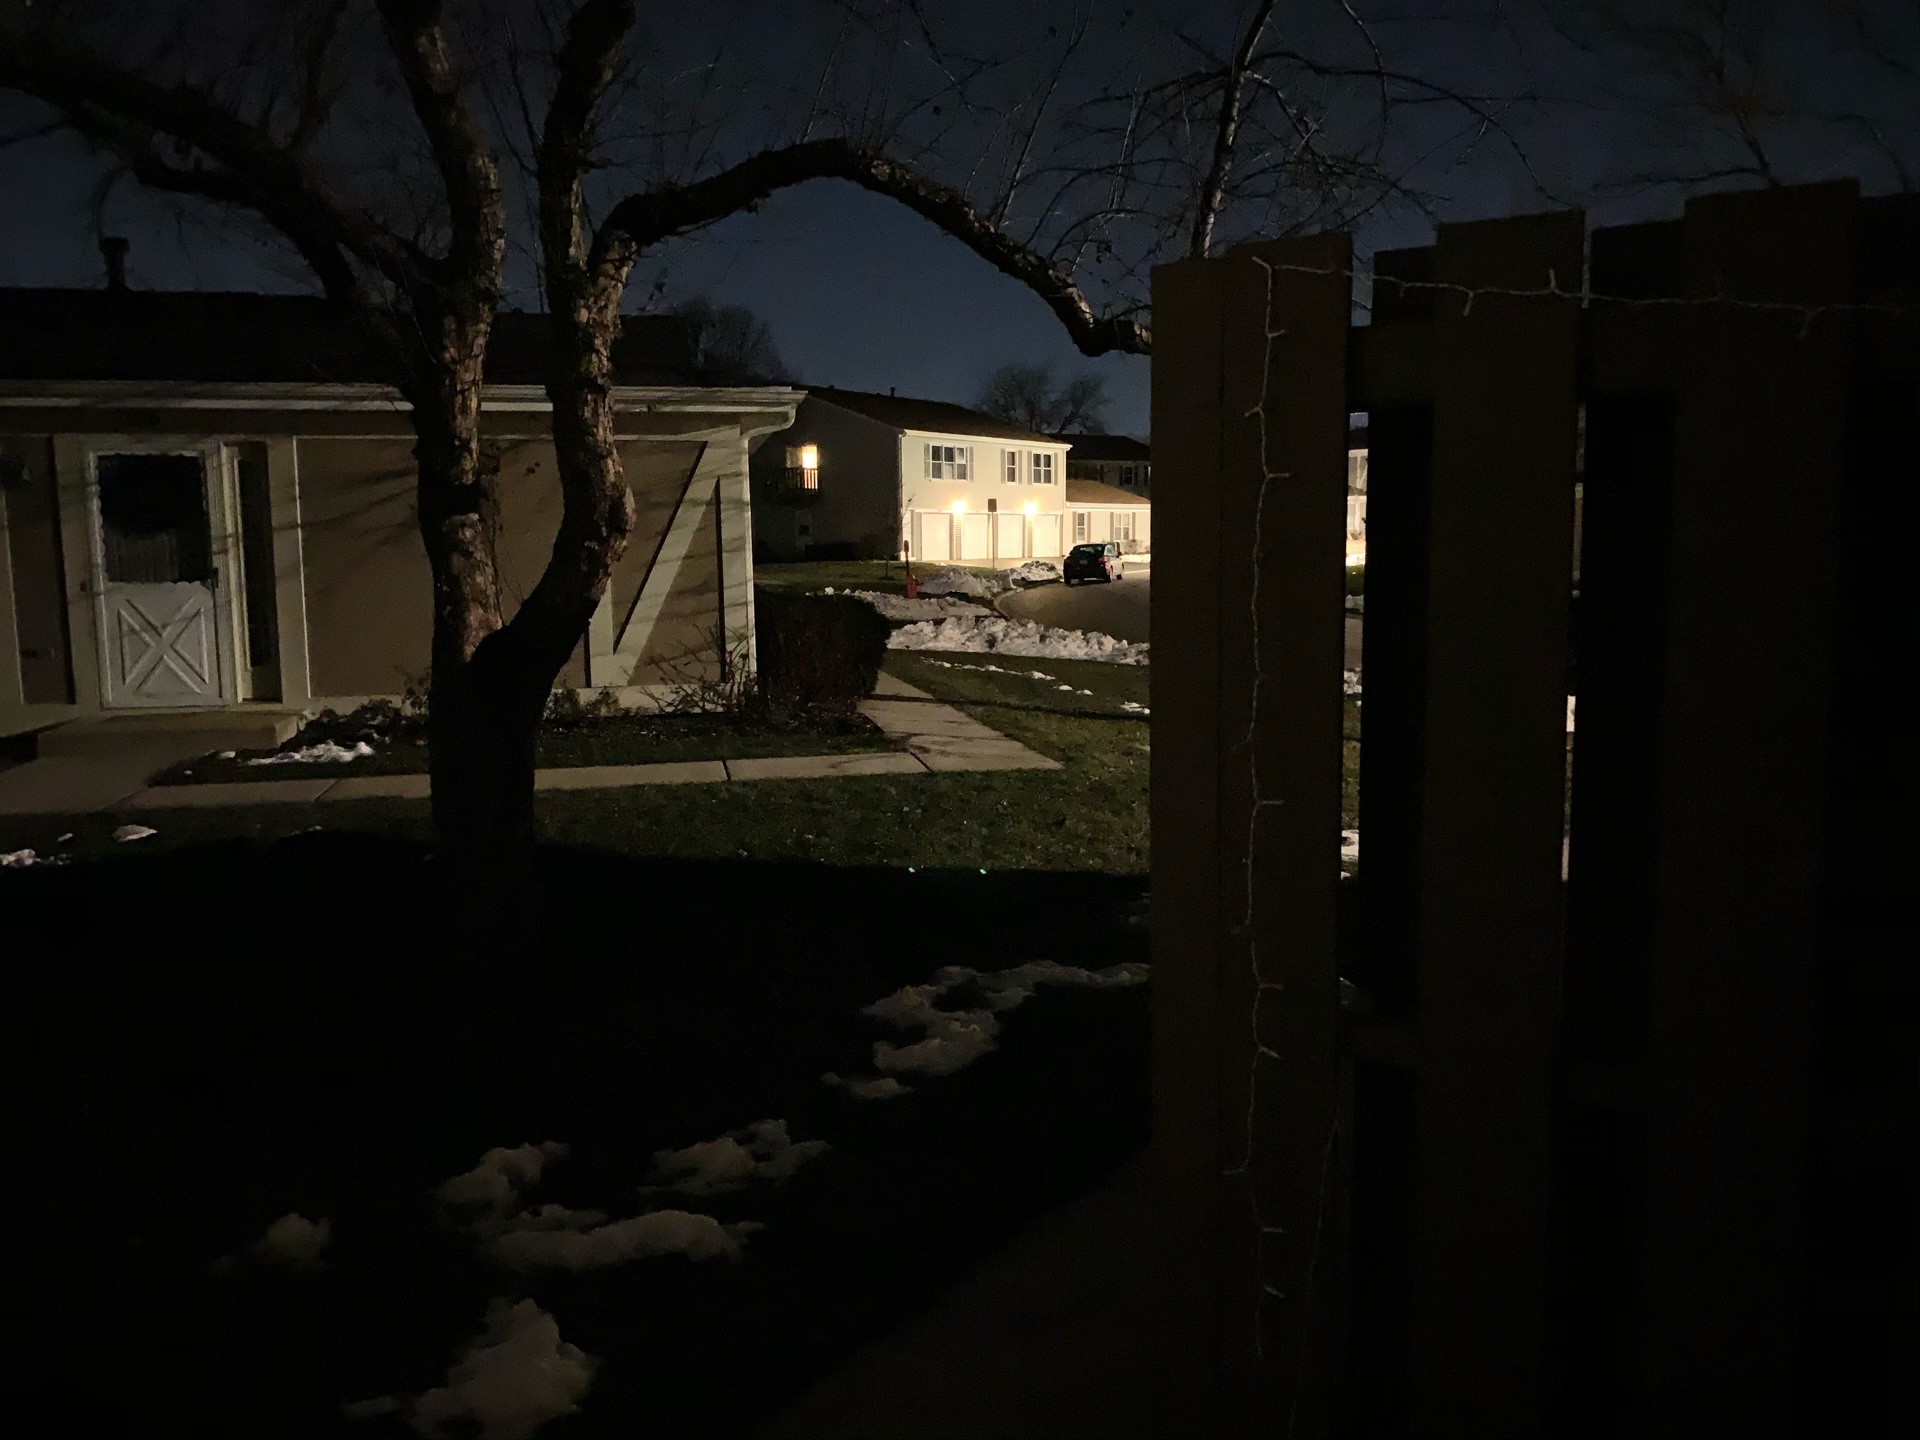

In [32]:
low_light_img

In [33]:
low_light_img = low_light_img.resize((256,256),Image.NEAREST)

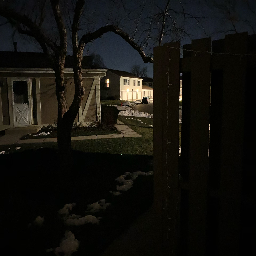

In [34]:
low_light_img

In [35]:
from tensorflow.keras.preprocessing import image
image = image.img_to_array(low_light_img)


In [36]:
image.shape

(256, 256, 3)

In [37]:
image = image.astype('float32') / 255.0

In [38]:
image.shape

(256, 256, 3)

In [39]:
image = np.expand_dims(image, axis = 0)
image.shape

(1, 256, 256, 3)

In [40]:
output = model.predict(image)

1/1 [==============================] - 21s 21s/step


In [41]:
output_image = output[0] * 255.0

In [42]:
output_image.shape

(256, 256, 3)

In [43]:
output_image = output_image.clip(0,255)

In [44]:
output_image.shape

(256, 256, 3)

In [45]:
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))

In [46]:
output_image

array([[[ 77.91699 ,  77.96489 ,  67.32133 ],
        [ 93.80715 ,  91.892   ,  82.42476 ],
        [ 96.06205 , 108.21558 ,  94.19369 ],
        ...,
        [122.651505, 122.69553 , 133.22162 ],
        [112.59497 , 111.64597 , 110.78479 ],
        [ 87.21388 ,  83.27097 ,  90.92536 ]],

       [[ 84.96854 ,  86.180374,  83.240906],
        [104.16626 , 100.641426,  94.678055],
        [109.8202  , 121.47066 ,  98.348694],
        ...,
        [120.01546 , 142.66046 , 148.58418 ],
        [123.08897 , 139.3681  , 136.49303 ],
        [104.95769 , 107.622955, 114.352325]],

       [[ 98.82488 , 100.24291 , 101.39693 ],
        [124.002754, 113.311005,  98.77413 ],
        [112.864746, 125.32243 , 103.88124 ],
        ...,
        [131.01993 , 145.51111 , 152.63368 ],
        [135.09663 , 144.01534 , 140.13443 ],
        [121.302574, 123.717995, 121.04221 ]],

       ...,

       [[ 47.135296,  45.283997,  37.67376 ],
        [ 59.346764,  52.633007,  40.218395],
        [ 49.609917,  

In [47]:
output_image = np.uint32(output_image)

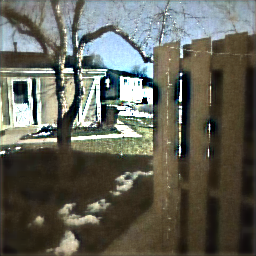

In [48]:
Image.fromarray(output_image.astype('uint8'),'RGB')


In [49]:
model.save("model.h5")